[colaboratoryで開く  ](https://colab.research.google.com/github/tenajima/hello_machine_learning/blob/master/hello_boston.ipynb)

-------------------------

In [1]:
# リッチな見た目のグラフライブラリ
import gc

import numpy as np
import seaborn as sns

In [2]:
# gcを使えるようにする.
gc.enable()
# del hoge
# gc.collect() で使える

# グラフの見た目をいい感じにする
sns.set()

# 住宅価格の予想でこんにちは

## データのダウンロード

In [3]:
from sklearn.datasets import load_boston

なにこれって関数の中身とか知りたいときは...

In [4]:
load_boston?

In [5]:
boston = load_boston()

## 特徴量の確認

In [6]:
boston.data

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

## 正解ラベルの確認

In [7]:
boston.target

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

In [8]:
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

詳しくはこちら(https://scikit-learn.org/stable/datasets/index.html#boston-dataset)  
日本語ではこちら(https://pythondatascience.plavox.info/scikit-learn/scikit-learn%E3%81%AB%E4%BB%98%E5%B1%9E%E3%81%97%E3%81%A6%E3%81%84%E3%82%8B%E3%83%87%E3%83%BC%E3%82%BF%E3%82%BB%E3%83%83%E3%83%88)

# pandasを使って見やすくデータ分析をする

In [9]:
import pandas as pd

In [10]:
df = pd.DataFrame(boston.data, columns=boston.feature_names)

## いろいろできます

### 相関係数

In [11]:
df.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993


### AGEが50以上のデータ抽出

In [12]:
df.query('AGE > 50')

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93
9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,386.71,17.10
10,0.22489,12.5,7.87,0.0,0.524,6.377,94.3,6.3467,5.0,311.0,15.2,392.52,20.45


### 欠損値の確認

In [13]:
# このデータに欠損値はない
df.isna().sum() / df.shape[0]

CRIM       0.0
ZN         0.0
INDUS      0.0
CHAS       0.0
NOX        0.0
RM         0.0
AGE        0.0
DIS        0.0
RAD        0.0
TAX        0.0
PTRATIO    0.0
B          0.0
LSTAT      0.0
dtype: float64

# 学習するための準備

予測するためのデータについて考えます.  
- boston.dataには学習するための情報(boston.data)と答え(boston.target)がある.
- 実際に必要なのは未知データに対しての予測値.
- データを学習する部分と,モデルの性能を評価する部分に分ける必要がある.

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
# もとのデータの形
boston.data.shape

(506, 13)

In [16]:
train_X, test_X, train_y, test_y = train_test_split(boston.data, boston.target, test_size=0.3, random_state=42)

In [17]:
# 学習用のデータの形
train_X.shape

(354, 13)

In [18]:
# test用のデータの形
test_X.shape

(152, 13)

# 線形回帰

 $y = w_0 + w_1x_1 + w_2x_2 + \cdots + w_nx_n$

In [19]:
#x1, x2などは各列(特徴量)の値です.
df.head(1)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.09,1.0,296.0,15.3,396.9,4.98


学習するのは$w_i$の部分です.

In [20]:
from sklearn.linear_model import LinearRegression

scikit-learnのAPIの流れは,
1. モデルのインスタンスの作成
1. fitメソッドで学習
1. predictメソッドで予測

です.

In [21]:
# モデルのインスタンスを作成
model = LinearRegression()

In [22]:
# 学習
model.fit(train_X, train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [23]:
# 予測
predict = model.predict(test_X)

## モデルの精度検証

In [24]:
from sklearn.metrics import mean_squared_error

In [25]:
mean_squared_error(test_y, predict) ** 0.5

4.638689926172788

4638ドルのズレ☆

## 重みの可視化

重み$w_i$がどの様になっているか可視化します.  
重みの絶対値が大きいほど影響が大きいと言えます.

In [26]:
import matplotlib.pyplot as plt

In [27]:
def plot_weight(model):
    fig, ax = plt.subplots(figsize=(16, 8))
    x = list(range(model.coef_.size))
    y = model.coef_
    ax.bar(x, y)
    ax.set_xticklabels(boston.feature_names) 
    

figやらaxやらについて詳しく知りたい人向け(https://qiita.com/skotaro/items/08dc0b8c5704c94eafb9)

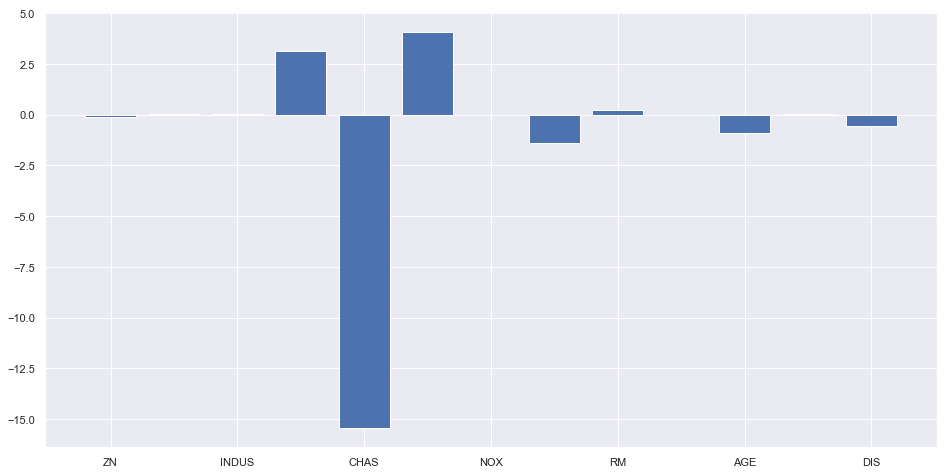

In [28]:
plot_weight(model)

# データのスケールを合わせる 

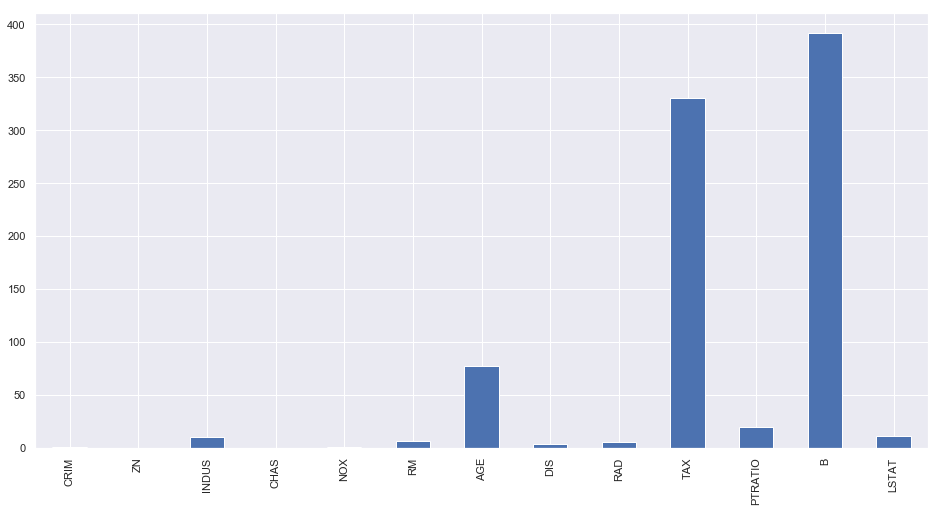

In [29]:
df.median().plot.bar(figsize=(16, 8))

## データの標準化

特徴量の平均値を$\mu$,標準偏差を$\sigma$として,標準化された値zは,  
$z = \frac{x - \mu}{\sigma}$  
と表される.

In [30]:
from sklearn.preprocessing import StandardScaler

In [31]:
transformer = StandardScaler()

In [32]:
train_X_norm = transformer.fit_transform(train_X)

In [33]:
test_X_norm = transformer.transform(test_X)

In [34]:
model = LinearRegression()
model.fit(train_X_norm, train_y)
predict = model.predict(test_X_norm)

In [35]:
mean_squared_error(test_y, predict) ** 0.5

4.6386899261728205

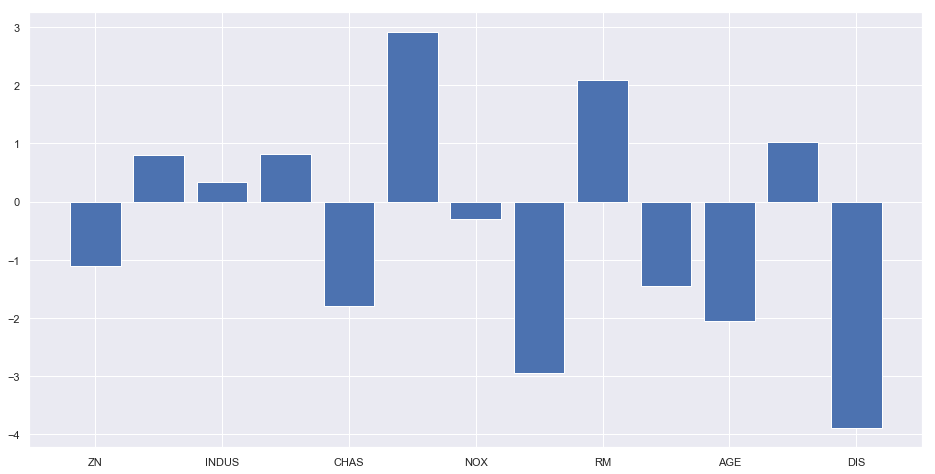

In [36]:
plot_weight(model)

In [37]:
del model, transformer
gc.collect()

6041

## データの正規化

In [38]:
from sklearn.preprocessing import Normalizer

正規化された値$z$は,特徴量ベクトルのノルムを$L$として  
$z = \frac{z}{L}$  
と表される.

In [39]:
X = [[4, 1, 2, 2],
     [1, 3, 9, 3],
     [5, 7, 5, 1]]
transformer = Normalizer().fit(X) # fit does nothing.
transformer.transform(X)

array([[0.8, 0.2, 0.4, 0.4],
       [0.1, 0.3, 0.9, 0.3],
       [0.5, 0.7, 0.5, 0.1]])

In [40]:
np.linalg.norm(X, axis=1)

array([ 5., 10., 10.])

In [41]:
np.linalg.norm(transformer.transform(X), axis=1)

array([1., 1., 1.])

-------------

In [42]:
transformer = Normalizer()

In [43]:
train_X_norm = transformer.fit_transform(train_X)

In [44]:
test_X_norm = transformer.transform(test_X)

In [45]:
model = LinearRegression()
model.fit(train_X_norm, train_y)
predict = model.predict(test_X_norm)

In [46]:
mean_squared_error(test_y, predict) ** 0.5

4.54524618453968

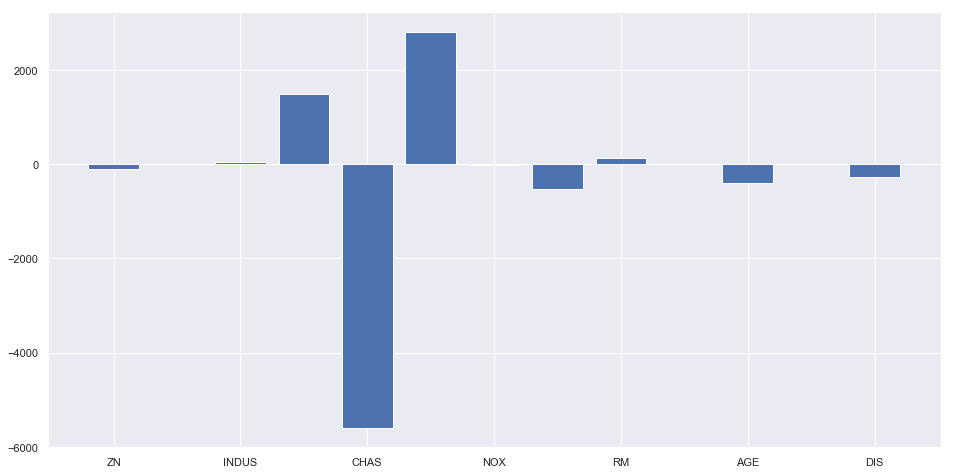

In [47]:
plot_weight(model)

In [48]:
del model, transformer
gc.collect()

2818

## 同じことを何回もするの大変なのでこれ以降はPipeLine化する

In [49]:
from sklearn.pipeline import make_pipeline

In [50]:
pl = make_pipeline(Normalizer(), LinearRegression())

In [51]:
pl.fit(train_X, train_y)
predict_linear = pl.predict(test_X)
mean_squared_error(test_y, predict_linear) ** 0.5

4.54524618453968

# 正則化項をいれる

In [52]:
from sklearn.linear_model import Ridge, Lasso

## 正則化項とは?
- 重みが大きくなりすぎて過学習に陥るのを防ぐ
- 相関があるデータに対してパラメータを推定できるようにするための制約条件

式にすると,今最小化したい関数を$Q({\bf w})$とすると,  
$ R({\bf w}) = Q({\bf w}) + {\alpha}\sum|w|^q$  
$ R({\bf w})$を最小化する問題になる.

## Lasso

正則化項における$q=1$の正則化項を加える.  

In [53]:
pl = make_pipeline(Normalizer(), Lasso(alpha=1e-4))
pl.fit(train_X, train_y)
predict_lasso = pl.predict(test_X)
mean_squared_error(test_y, predict_lasso) ** 0.5

4.6291124862976085

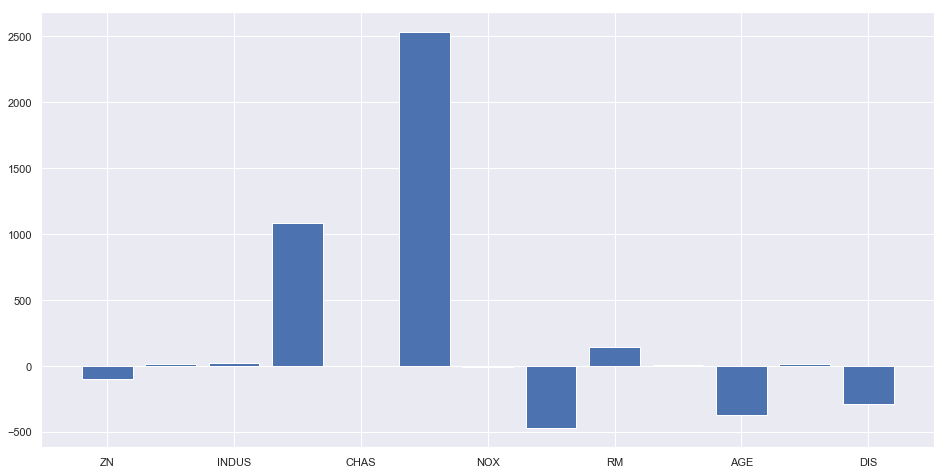

In [54]:
plot_weight(pl.named_steps['lasso'])

## Ridge

正則化項における$q=2$の正則化項を加える.  

In [55]:
pl = make_pipeline(Normalizer(), Ridge(alpha=1))
pl.fit(train_X, train_y)
predict_ridge = pl.predict(test_X)
mean_squared_error(test_y, predict_ridge) ** 0.5

7.039143100658084

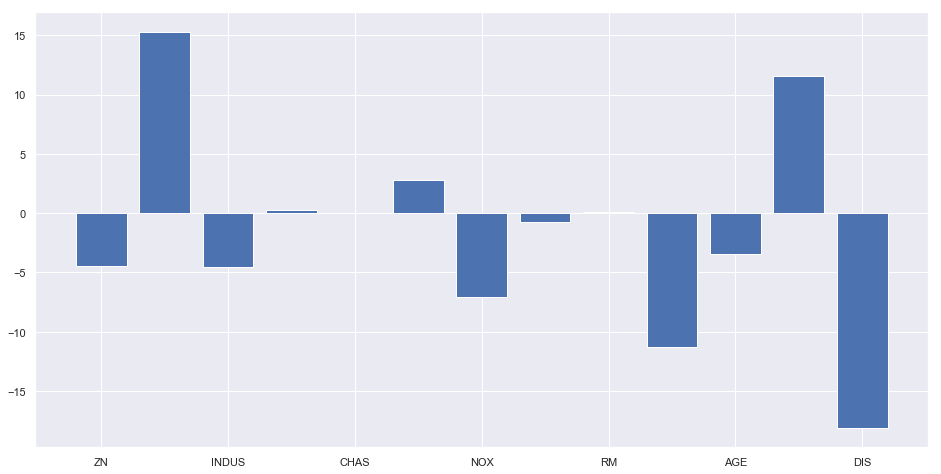

In [56]:
plot_weight(pl.named_steps['ridge'])

# まとめ

- まずはどんなデータかを理解する
- 機械にデータを理解させるための前処理をする
- 良さげな特徴量をつくる
- 過学習と学習不足に気を配る

# Appendix

最近流行りのlightGBMという強いモデルを扱ってるライブラリでも試してみる

In [57]:
from lightgbm import LGBMRegressor
import lightgbm as lgb
from sklearn.model_selection import KFold

/Users/mizutani/python-env/deep-learning/lib/python3.6/site-packages/lightgbm/__init__.py:46: UserWarning: Starting from version 2.2.1, the library file in distribution wheels for macOS is built by the Apple Clang (Xcode_8.3.3) compiler.
This means that in case of installing LightGBM from PyPI via the ``pip install lightgbm`` command, you don't need to install the gcc compiler anymore.
Instead of that, you need to install the OpenMP library, which is required for running LightGBM on the system with the Apple Clang compiler.
You can install the OpenMP library by the following command: ``brew install libomp``.
  "You can install the OpenMP library by the following command: ``brew install libomp``.", UserWarning)


In [58]:
train_X.shape

(354, 13)

In [59]:
kfold = KFold(n_splits=5, shuffle=True, random_state=81)

In [60]:
params = {
    'n_estimators': 10000,
    'seed': 81,
    'metric': 'rmse',
    'num_leaves': 8,
    'min_data_in_leaf': 15,
    'max_depth': 7,
}

In [61]:
train_X = pd.DataFrame(train_X, columns=boston.feature_names)
test_X = pd.DataFrame(test_X, columns=boston.feature_names)

In [62]:
preds = np.zeros(test_X.shape[0])
for n_fold, (train_idx, valid_idx) in enumerate(kfold.split(train_X)):
    trn_x, trn_y = train_X.iloc[train_idx], train_y[train_idx]
    val_x, val_y = train_X.iloc[valid_idx], train_y[valid_idx]
    
    model = LGBMRegressor(**params)
    model.fit(
        trn_x, trn_y,
        eval_set=[(trn_x, trn_y), (val_x, val_y)],
        early_stopping_rounds=200,
        verbose=100
    )
    preds += model.predict(test_X) / kfold.get_n_splits()

Training until validation scores don't improve for 200 rounds.
[100]	training's rmse: 1.65669	valid_1's rmse: 2.95189
[200]	training's rmse: 1.03598	valid_1's rmse: 2.92004
[300]	training's rmse: 0.71076	valid_1's rmse: 2.98671
Early stopping, best iteration is:
[149]	training's rmse: 1.29356	valid_1's rmse: 2.88064
Training until validation scores don't improve for 200 rounds.
[100]	training's rmse: 1.61341	valid_1's rmse: 3.79438
[200]	training's rmse: 1.00384	valid_1's rmse: 3.87613
[300]	training's rmse: 0.685937	valid_1's rmse: 3.94505
Early stopping, best iteration is:
[102]	training's rmse: 1.5993	valid_1's rmse: 3.78486
Training until validation scores don't improve for 200 rounds.
[100]	training's rmse: 1.38715	valid_1's rmse: 4.22723
[200]	training's rmse: 0.850054	valid_1's rmse: 4.23667
[300]	training's rmse: 0.589187	valid_1's rmse: 4.21247
Early stopping, best iteration is:
[129]	training's rmse: 1.17701	valid_1's rmse: 4.19974
Training until validation scores don't impro

In [63]:
mean_squared_error(test_y, preds)**0.5

3.091335722795448

# モデルの分析

In [65]:
feature_importance = pd.DataFrame([model.feature_importances_], columns=train_X.columns)

In [66]:
feature_importance

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,64,3,17,19,52,111,76,93,12,39,45,42,127


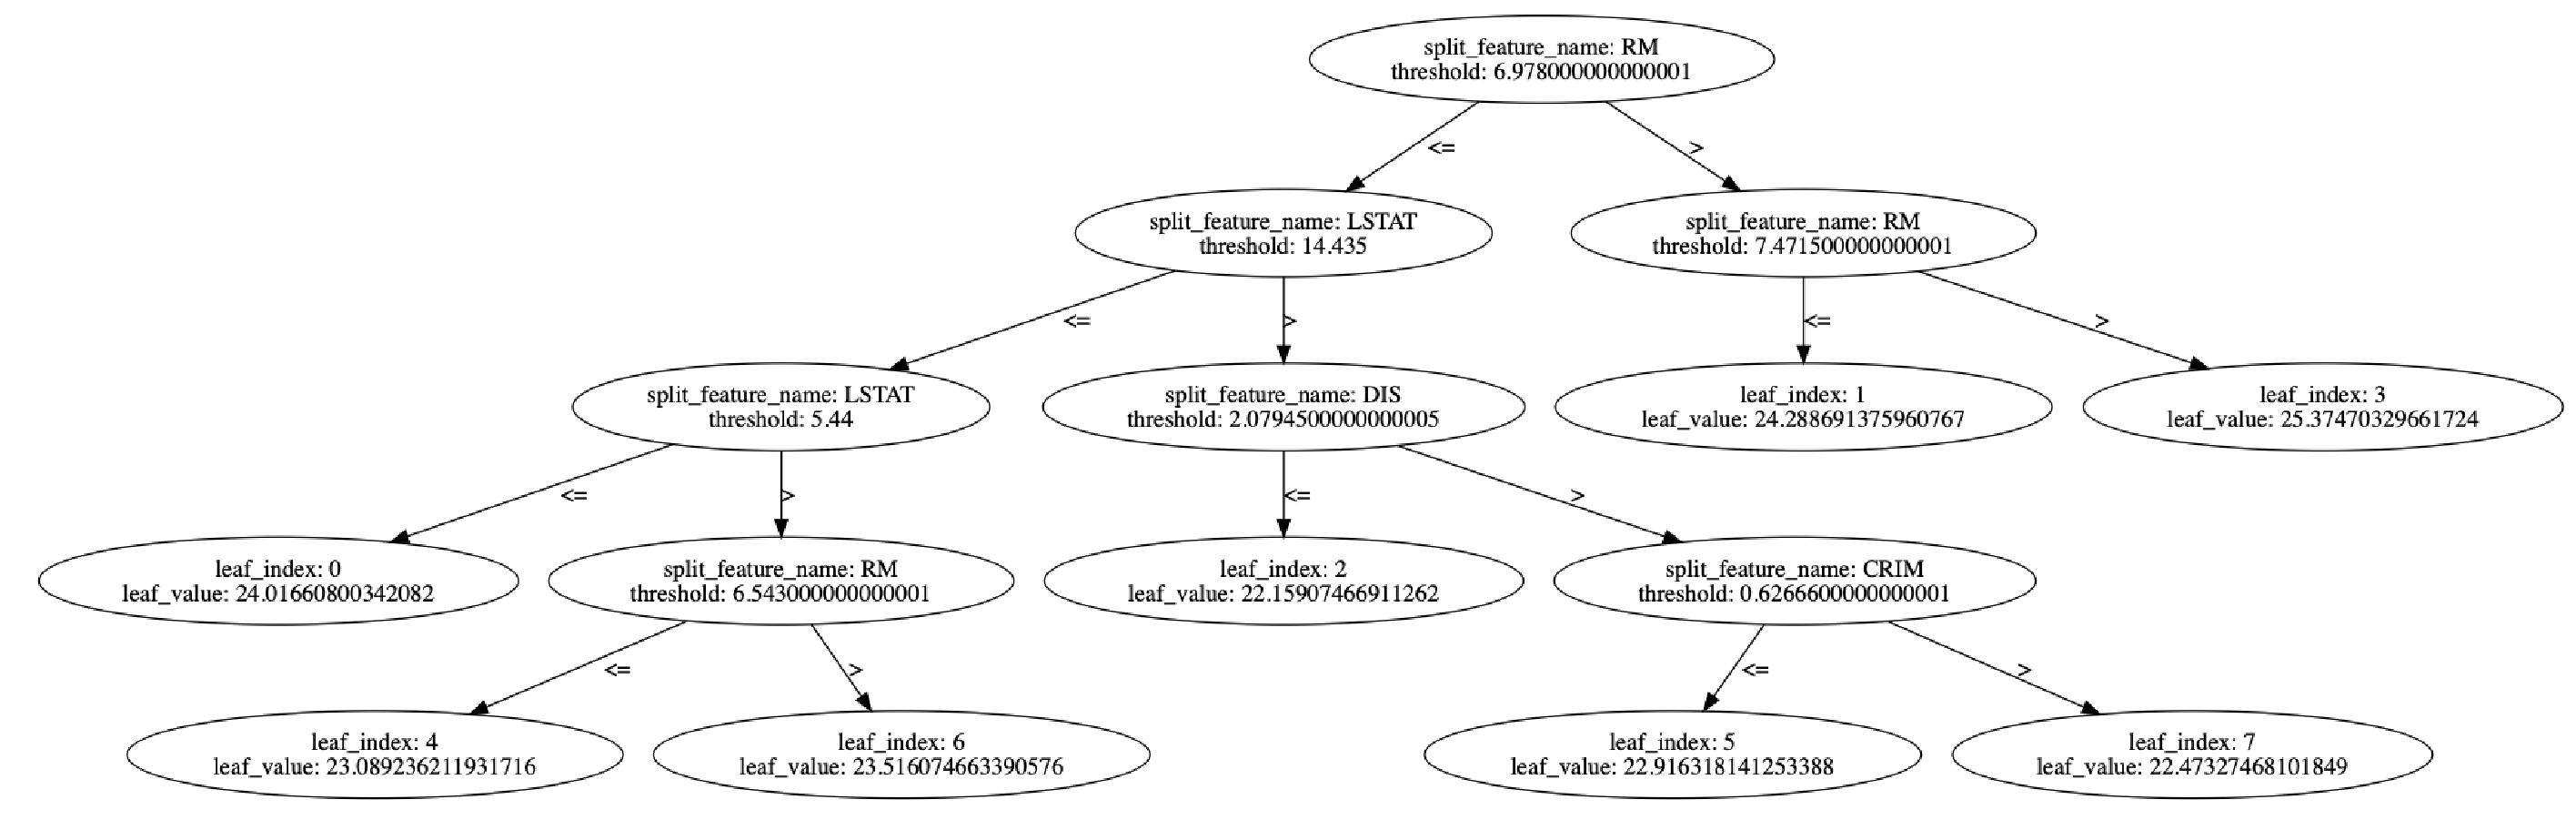

In [77]:
lgb.plot_tree(model, figsize=(50, 50))